<a href="https://colab.research.google.com/github/Jurgenvdh/project-1-deep-learning-image-classification-with-cnn/blob/main/Project_1_Deep_Learning_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Dropout

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images
mean = train_images.mean(axis=(0,1,2), keepdims=True)
std = train_images.std(axis=(0,1,2), keepdims=True)
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images)

model = models.Sequential()

weight_decay = 1e-4

# First Block
model.add(layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                             input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Second Block
model.add(layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third Block
model.add(layers.Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from tensorflow.keras.optimizers import Adam

# Define the optimizer with a suitable learning rate
optimizer = Adam(learning_rate=0.005)

model.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])


def lr_scheduler(epoch):
    if epoch < 30:
        return 0.001
    else:
        return 0.0001

lr_callback = LearningRateScheduler(lr_scheduler)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15, restore_best_weights=True)



history = model.fit(datagen.flow(train_images, train_labels, batch_size=100),
                              epochs=50,
                              validation_data=(test_images, test_labels),
                              callbacks=[lr_callback, early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.3475 - loss: 2.1274 - val_accuracy: 0.6038 - val_loss: 1.2133 - learning_rate: 0.0010
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.5787 - loss: 1.2873 - val_accuracy: 0.6674 - val_loss: 1.0321 - learning_rate: 0.0010
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.6647 - loss: 1.0550 - val_accuracy: 0.7128 - val_loss: 0.9532 - learning_rate: 0.0010
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.7044 - loss: 0.9436 - val_accuracy: 0.6949 - val_loss: 1.0720 - learning_rate: 0.0010
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.7396 - loss: 0.8695 - val_accuracy: 0.7116 - val_loss: 0.9963 - learning_rate: 0.0010
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.7589 - loss: 0.8158 - val_accuracy: 0.7781 - val_loss: 0.8002 - learning_rate: 0.0010
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.7696 - loss: 0.7920

313/313 - 1s - 4ms/step - accuracy: 0.9023 - loss: 0.4995


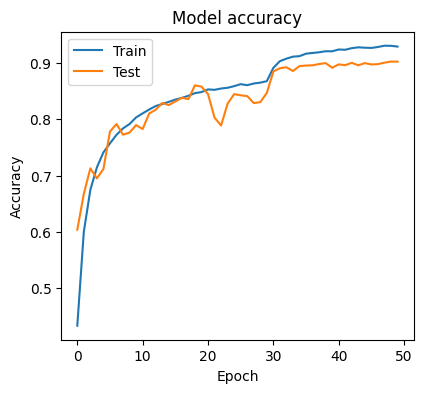

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Plot training & validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [7]:
# Compute metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predicted labels
predicted_labels = model.predict(test_images).argmax(axis=1)
true_labels = test_labels.flatten() # Flatten test labels to match predicted labels shape

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1-score: {f1:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Validation Accuracy: 0.9023
Validation Precision: 0.9027
Validation Recall: 0.9023
Validation F1-score: 0.9016


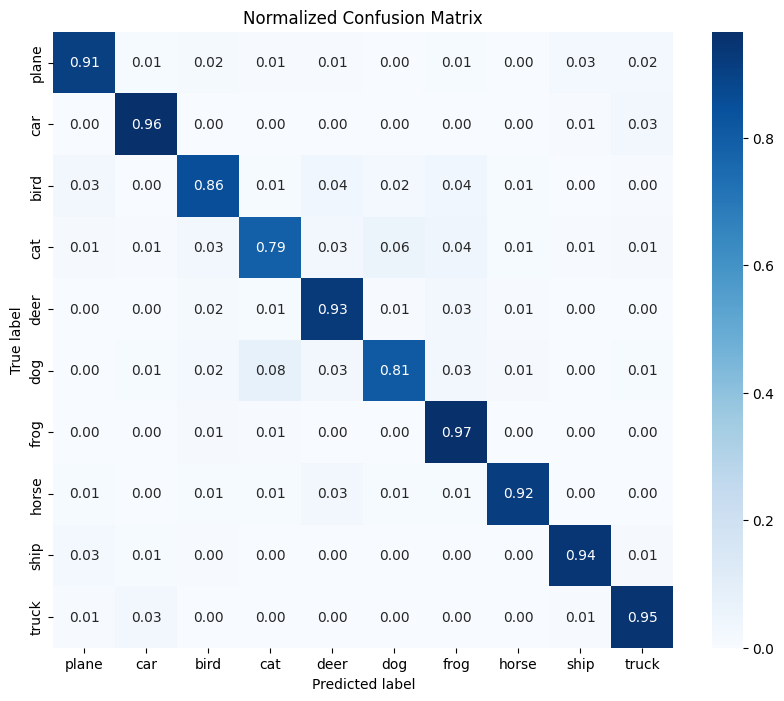

In [9]:
!pip install seaborn
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class names
class_names = ['plane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()